In [1]:
from model import StressModel
import agentpy as ap
import pandas as pd
import pickle
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

In [2]:
sl_data = pd.read_csv('../data/processed/sl_processed_data_75_balanced.csv').set_index(['user', 'date'])
fbk_data = pd.read_csv('../data/processed/fbk_processed_data_75_balanced_cut.csv').set_index(['user', 'date'])

sl_model = pickle.load(open('../trained_models/sl_data_75_balanced_model_trained.pickle', "rb"))
fbk_model = pickle.load(open('../trained_models/fbk_data_75_balanced_notcut_model_trained.pickle', "rb"))

Scheduled runs: 1
Completed: 1, estimated time remaining: 0:00:00
Experiment finished
Run time: 0:00:00.809810


[Text(0.5, 0, 'Time'),
 Text(0, 0.5, 'Stress'),
 (1.0, 3.0),

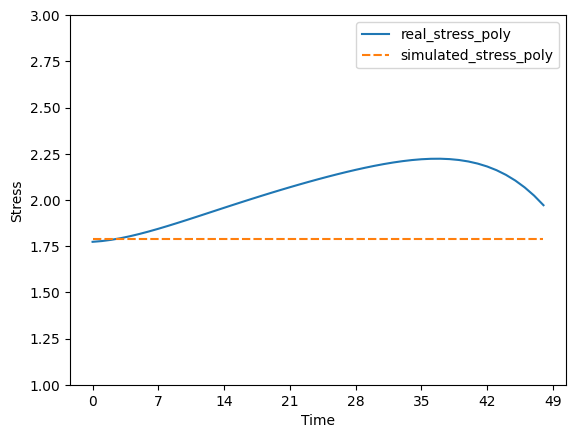

In [3]:
parameters = {
    'dataset_path': '../data/processed/sl_processed_data_75_balanced.csv',
    'predictor': sl_model,
    'steps': sl_data.reset_index()['date'].unique().shape[0]-1,
    'seed': 24091993,
    'dataset_name': 'StudentLife',
}

model = ap.Experiment(StressModel, parameters, iterations=1, record=True)
results = model.run()

d = pd.DataFrame(index=results['variables']['WorkerAgent'].groupby('t').mean().index)
d['simulated_stress'] = results['variables']['WorkerAgent'].groupby('t').mean()['stress']
d['real_stress'] = sl_data.reset_index().groupby('date').mean(numeric_only=True).reset_index()['stress']

poly = np.polyfit(results['variables']['WorkerAgent'].groupby('t').mean().index, d['real_stress'], deg=5)
poly2 = np.polyfit(results['variables']['WorkerAgent'].groupby('t').mean().index, d['simulated_stress'], deg=5)

d['real_stress_poly'] = np.polyval(poly, results['variables']['WorkerAgent'].groupby('t').mean().index)
d['simulated_stress_poly'] = np.polyval(poly2, results['variables']['WorkerAgent'].groupby('t').mean().index)

g = sns.lineplot(data=d[['real_stress_poly', 'simulated_stress_poly']])
g.set(xlabel='Time', ylabel='Stress', ylim=(1, 3),xticks=range(0, results['variables']['WorkerAgent'].groupby('t').mean().index.shape[0]+2, 7))

In [4]:
d

,simulated_stress,real_stress,real_stress_poly,simulated_stress_poly
t,,,,
0,1.789474,1.789474,1.773260,1.789474
1,1.789474,1.789474,1.777453,1.789474
2,1.789474,1.763158,1.784190,1.789474
3,1.789474,1.815789,1.793086,1.789474
4,1.789474,1.868421,1.803796,1.789474
5,1.789474,1.763158,1.816010,1.789474
6,1.789474,1.684211,1.829451,1.789474
7,1.789474,1.815789,1.843875,1.789474
8,1.789474,1.947368,1.859065,1.789474


Scheduled runs: 1
Completed: 1, estimated time remaining: 0:00:00
Experiment finished
Run time: 0:00:00.599487


[Text(0.5, 0, 'Time'),
 Text(0, 0.5, 'Stress'),
 (1.0, 3.0),

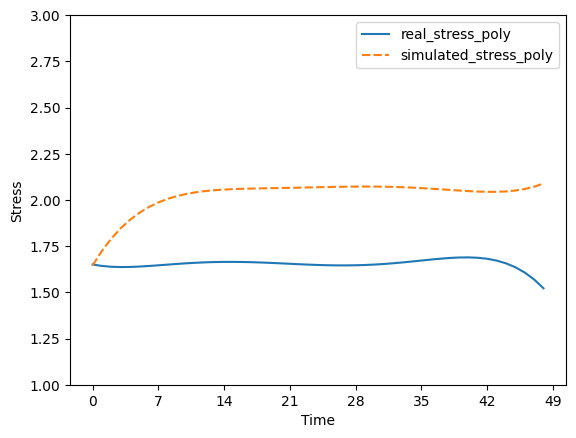

In [5]:
parameters = {
    'dataset_path': '../data/processed/fbk_processed_data_75_balanced_notcut.csv',
    'seed': 24091993,
    'predictor': fbk_model,
    'steps': fbk_data.reset_index()['date'].unique().shape[0]-1,
    'dataset_name': 'FBK',
}

model = ap.Experiment(StressModel, parameters, iterations=1, record=True)
results = model.run()

d = pd.DataFrame(index=results['variables']['WorkerAgent'].groupby('t').mean().index)
d['simulated_stress'] = results['variables']['WorkerAgent'].groupby('t').mean()['stress']
d['real_stress'] =fbk_data.reset_index().groupby('date').mean(numeric_only=True).reset_index()['stress']

poly = np.polyfit(results['variables']['WorkerAgent'].groupby('t').mean().index, d['real_stress'], deg=5)
poly2 = np.polyfit(results['variables']['WorkerAgent'].groupby('t').mean().index, d['simulated_stress'], deg=5)

d['real_stress_poly'] = np.polyval(poly, results['variables']['WorkerAgent'].groupby('t').mean().index)
d['simulated_stress_poly'] = np.polyval(poly2, results['variables']['WorkerAgent'].groupby('t').mean().index)

g = sns.lineplot(data=d[['real_stress_poly', 'simulated_stress_poly']])
g.set(xlabel='Time', ylabel='Stress', ylim=(1, 3), xticks=range(0, results['variables']['WorkerAgent'].groupby('t').mean().index.shape[0]+2, 7))

In [6]:
d

,simulated_stress,real_stress,real_stress_poly,simulated_stress_poly
t,,,,
0,1.666667,1.666667,1.650618,1.645180
1,1.733333,1.700000,1.642669,1.724430
2,1.800000,1.666667,1.638310,1.791176
3,1.800000,1.633333,1.636759,1.846936
4,1.900000,1.600000,1.637327,1.893108
5,1.900000,1.533333,1.639413,1.930968
6,1.966667,1.533333,1.642499,1.961680
7,2.000000,1.500000,1.646146,1.986300
8,1.966667,1.666667,1.649988,2.005776
